In [1]:
from probs.gpt2 import next_distribution


2025-02-26 19:13:44.450354: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-26 19:13:44.466721: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-26 19:13:44.485093: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-26 19:13:44.490349: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-26 19:13:44.506163: I tensorflow/core/platform/cpu_feature_guar

In [2]:
text = 'The cat sat on the mat.'

Top 50 probable next bytes:
' ': 0.797191
'\xc4': 0.197802
'<': 0.002648
'\xc3': 0.000842
'T': 0.000196
'I': 0.000150
'H': 0.000123
'S': 0.000113
'A': 0.000092
'W': 0.000038
'"': 0.000035
'M': 0.000034
'.': 0.000033
'C': 0.000028
'B': 0.000026
'c': 0.000023
'L': 0.000023
'O': 0.000022
'D': 0.000022
'1': 0.000022
'F': 0.000021
'R': 0.000021
'N': 0.000020
'J': 0.000019
'*': 0.000019
'0': 0.000018
'P': 0.000017
'E': 0.000016
'i': 0.000014
'h': 0.000014
'a': 0.000014
''': 0.000013
'-': 0.000013
'2': 0.000013
'G': 0.000012
',': 0.000012
')': 0.000012
'3': 0.000012
's': 0.000011
'o': 0.000011
'~': 0.000010
't': 0.000009
'4': 0.000009
'Y': 0.000009
'K': 0.000009
':': 0.000008
'5': 0.000008
'n': 0.000008
'x': 0.000007
'p': 0.000007
Entropy at current position: 0.7766 bits


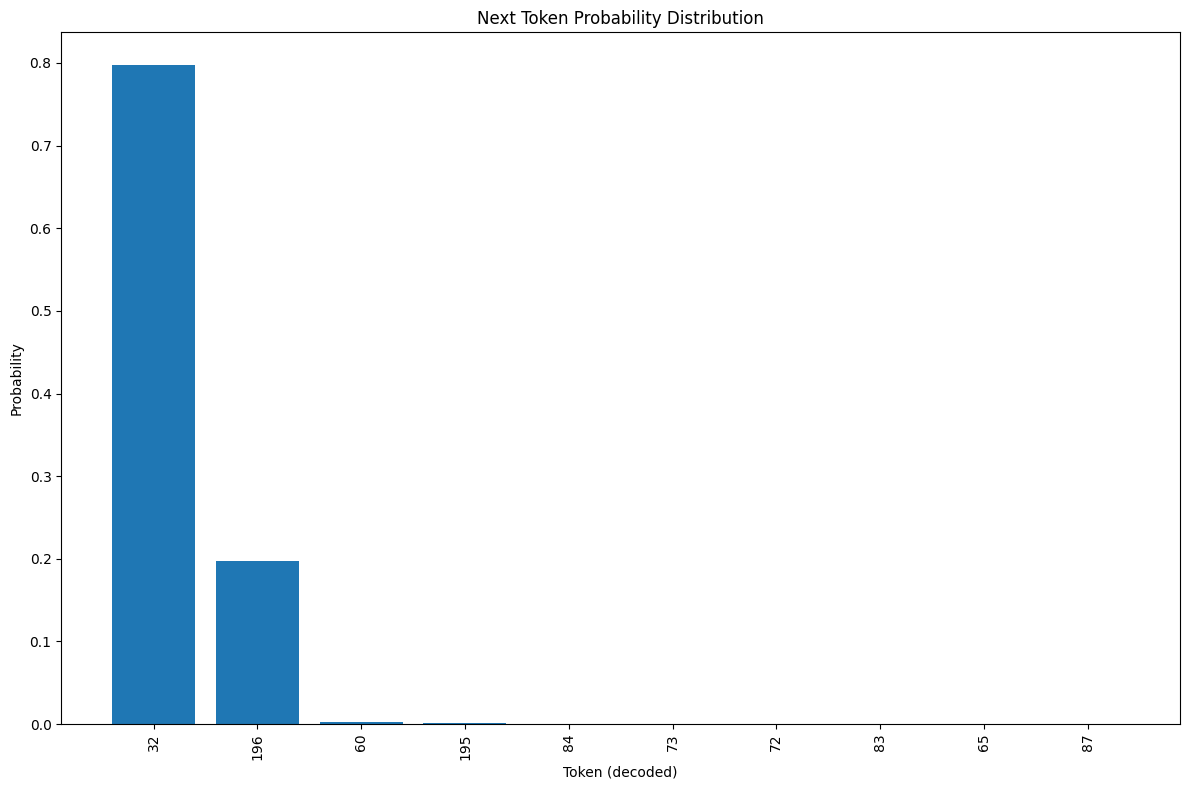

In [3]:
from probs.analysis import plot_probs
from math import log2

# First, let's look at the distribution for the next byte
probs = next_distribution(text)

# Print the top 50 most probable bytes
top_50 = sorted(probs.items(), key=lambda x: x[1], reverse=True)[:50]
print("Top 50 probable next bytes:")
for byte_val, prob in top_50:
    char_repr = chr(byte_val) if 32 <= byte_val <= 126 else f"\\x{byte_val:02x}"
    print(f"'{char_repr}': {prob:.6f}")

# Calculate entropy
entropy = -sum([p * log2(p) for t, p in probs.items()])
print(f"Entropy at current position: {entropy:.4f} bits")

# Plot the distribution
plot_probs(probs)




AUTOREGRESSIVE ANALYSIS
Starting with: 'The cat sat on the mat.'
Analyzing generation of: 'The cat sat on the mat.'
--------------------------------------------------

Position 1: Generating 'T'
Entropy at this position: 8.0000 bits
Probability of 'T': 0.003906
Surprise value: 8.0000 bits
Top 5 predicted bytes:
  \x00: 0.003906
  \x01: 0.003906
  \x02: 0.003906
  \x03: 0.003906
  \x04: 0.003906

Position 2: Generating 'h'
Entropy at this position: 4.4366 bits
Probability of 'h': 0.004337
Surprise value: 7.8489 bits
Top 5 predicted bytes:
   : 0.365721
  .: 0.076223
  a: 0.049694
  i: 0.038470
  \xc4: 0.033286

Position 3: Generating 'e'
Entropy at this position: 4.2665 bits
Probability of 'e': 0.023918
Surprise value: 5.3857 bits
Top 5 predicted bytes:
   : 0.338950
  a: 0.087759
  i: 0.078037
  o: 0.057554
  .: 0.044373

Position 4: Generating ' '
Entropy at this position: 0.8711 bits
Probability of ' ': 0.915696
Surprise value: 0.1271 bits
Top 5 predicted bytes:
   : 0.915696
  \xc4

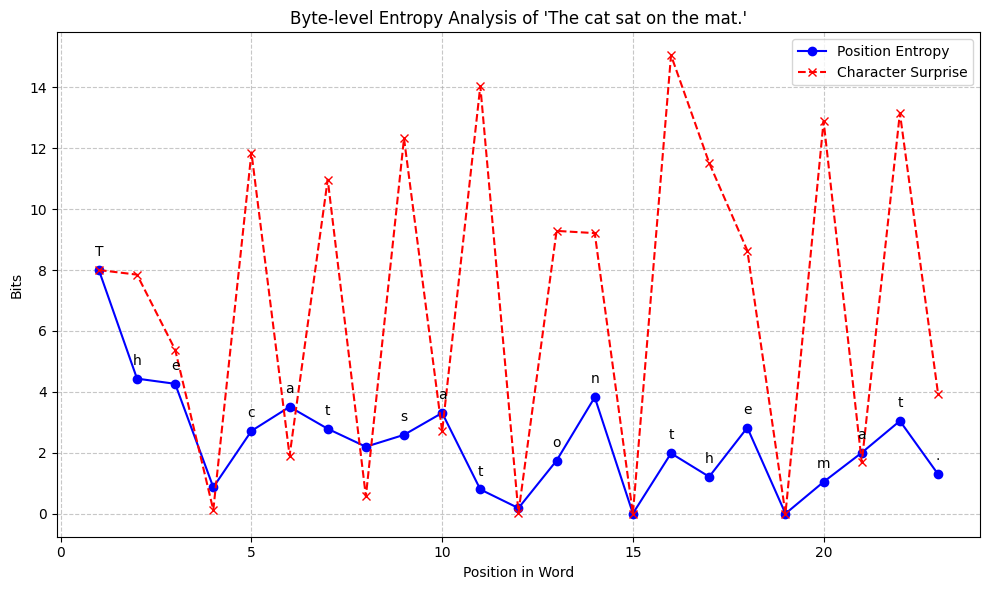

In [4]:
from probs.analysis import autoregressive_byte_analysis

# Now analyze a word autoregressively
print("\n" + "="*60)
print("AUTOREGRESSIVE ANALYSIS")
print("="*60)
results = autoregressive_byte_analysis(next_distribution, text)


    

Byte 2: 'h' - Entropy: 5.1927 bits
Byte 3: 'e' - Entropy: 4.7144 bits
Byte 4: ' ' - Entropy: 4.1666 bits
Byte 5: 'c' - Entropy: 0.7708 bits
Byte 6: 'a' - Entropy: 2.8167 bits
Byte 7: 't' - Entropy: 3.6094 bits
Byte 8: ' ' - Entropy: 2.6882 bits
Byte 9: 's' - Entropy: 2.1555 bits
Byte 10: 'a' - Entropy: 2.6542 bits
Byte 11: 't' - Entropy: 3.4354 bits
Byte 12: ' ' - Entropy: 1.0251 bits
Byte 13: 'o' - Entropy: 0.1690 bits
Byte 14: 'n' - Entropy: 1.6569 bits
Byte 15: ' ' - Entropy: 3.9211 bits
Byte 16: 't' - Entropy: 0.0099 bits
Byte 17: 'h' - Entropy: 2.0909 bits
Byte 18: 'e' - Entropy: 1.3158 bits
Byte 19: ' ' - Entropy: 2.8566 bits
Byte 20: 'm' - Entropy: 0.0055 bits
Byte 21: 'a' - Entropy: 1.0883 bits
Byte 22: 't' - Entropy: 2.0290 bits
Byte 23: '.' - Entropy: 3.1321 bits
Total entropy: 52.8228 bits
Mean Entropy: 2.2966 bits
Mean Surprise: 6.7395 bits


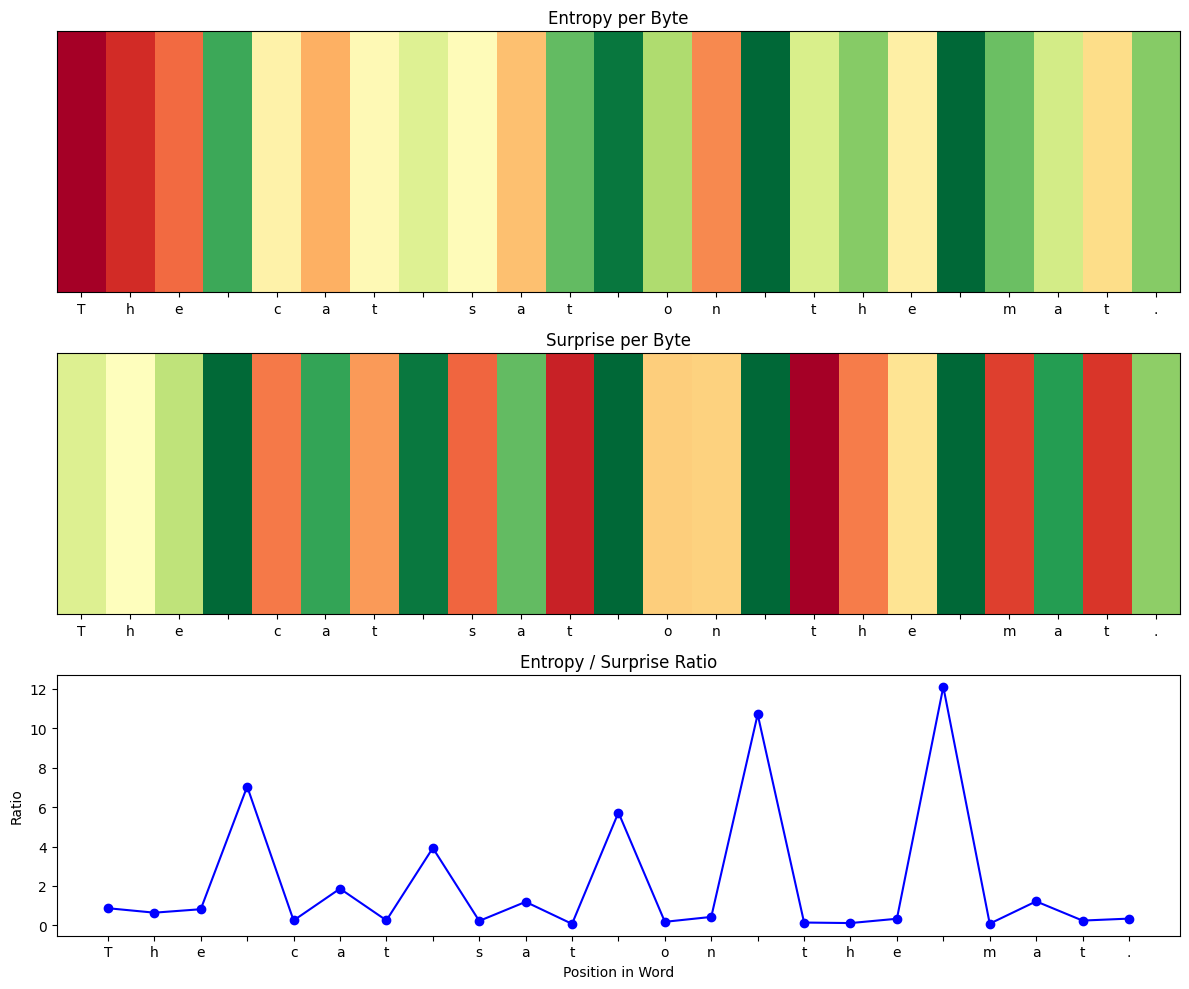

In [ ]:
from probs.analysis import sentence_information_visualization

# compute the total entropy
total_entropy = 0
total_surprise = 0
for r in results:
    total_entropy += r['entropy']
    total_surprise += r['surprise']
    i = r['position']
    if i >= len(text):
        break
    byte = text[i]
    print(f"Byte {i+1}: '{byte}' - Entropy: {r['entropy']:.4f} bits")
print(f"Total entropy: {total_entropy:.4f} bits")



    

mentropy,msurprise = (total_entropy/len(text),total_surprise/len(text))

print(f"Mean Entropy: {mentropy:.4f} bits")
print(f"Mean Surprise: {msurprise:.4f} bits")

sentence_information_visualization(text,results)